## Bài toán:
- cho tập dữ liệu:
    + x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
    + y = [7, 9, 2, 4, -1, 0, -4, -2, -5, -3, -3, 0, 2, 1, 8]
- Hãy chia tập dữ liệu thành 80/20 (train/test). Tính sắp xỉ mô hình bằng hổi quy đa thức bậc 2. Đánh giá MSE trên tập dữ liệu kiểm thử.
Dự báo y(11,5). Trực quan hóa dữ liệu, kết quả mô hình 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Nhập dữ liệu

X = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Y = [7, 9, 2, 4, -1, 0, -4, -2, -5, -3, -3, 0, 2, 1, 8]

In [4]:
n = len(Y)
n

15

In [5]:
# random vị trí dữ liệu

indexs = np.random.permutation(n)
indexs

array([10,  1, 13,  0,  5,  2, 14,  7, 11,  4, 12,  9,  3,  6,  8],
      dtype=int32)

In [6]:
# Lấy index cho tập train|test

trains = indexs[: int(n*0.8)]
tests = indexs[int(n*0.8): ]

In [7]:
X = np.array(X)
Y = np.array(Y)

In [8]:
# lấy tập train|test theo index đã random

X_train = X[trains]
y_train = Y[trains]

X_test = X[tests]
y_test = Y[tests] 


In [9]:
Xs_train = np.expand_dims(X_train, axis=1) # chuyển tập trên thành ma trận cột
Xs_train = np.concatenate((np.concatenate((np.ones_like(Xs_train), Xs_train), axis=1), Xs_train**2), axis=1) # Biến đổi ma trận lấy ra Ma trận tham số

Xs_train

array([[  1,  10, 100],
       [  1,   1,   1],
       [  1,  13, 169],
       [  1,   0,   0],
       [  1,   5,  25],
       [  1,   2,   4],
       [  1,  14, 196],
       [  1,   7,  49],
       [  1,  11, 121],
       [  1,   4,  16],
       [  1,  12, 144],
       [  1,   9,  81]])

In [10]:
Ys_train = np.expand_dims(y_train, axis=1)
Ys_train

array([[-3],
       [ 9],
       [ 1],
       [ 7],
       [ 0],
       [ 2],
       [ 8],
       [-2],
       [ 0],
       [-1],
       [ 2],
       [-3]])

In [11]:
# Tính trọng số a, b, c (vì đây là đa thức bậc 2 nên cơ sở là: {1, x, X^2})

params = np.linalg.inv(Xs_train.T.dot(Xs_train)).dot(Xs_train.T.dot(Ys_train))
params

array([[ 8.88852124],
       [-3.13756375],
       [ 0.20909863]])

In [12]:
Xs_test = np.expand_dims(X_test, axis=1)
Xs_test = np.concatenate((np.concatenate((np.ones_like(Xs_test), Xs_test), axis=1), Xs_test**2), axis=1)

Xs_test

array([[ 1,  3,  9],
       [ 1,  6, 36],
       [ 1,  8, 64]])

In [13]:
Ys_test = np.expand_dims(y_test, axis=1)
Ys_test

array([[ 4],
       [-4],
       [-5]])

In [14]:
# Dự đoán trên tập test 

y_pred = Xs_test.dot(params)
y_pred

array([[ 1.35771763],
       [-2.40931072],
       [-2.82967669]])

In [15]:
# Đánh giá sai số trên tập test

MSE = 1 / len(y_test) * np.linalg.norm(y_pred - y_test)**2
MSE

np.float64(59.717679547146055)

In [16]:
# Dự đoán y(11.5)
x = 11.5
x = np.array([[1, x, x**2]])

result = x.dot(params)
result


array([[0.45983139]])

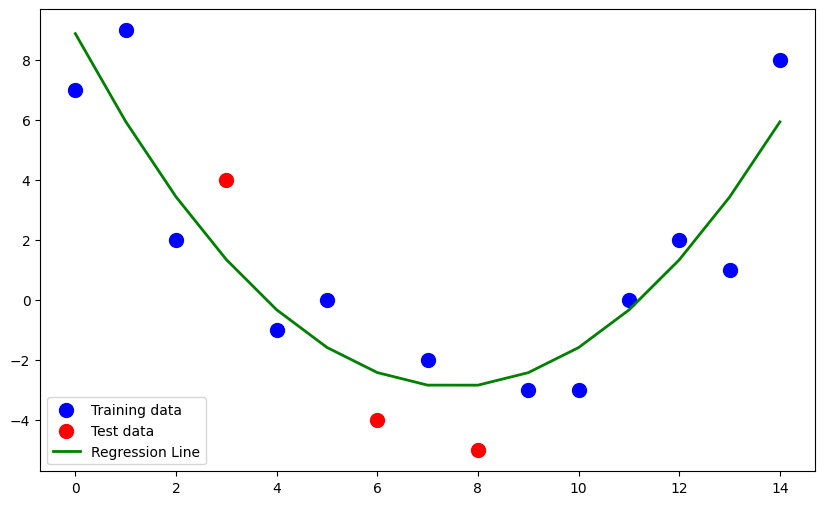

array([ 8.88852124,  5.96005612,  3.44978825,  1.35771763, -0.31615574,
       -1.57183185, -2.40931072, -2.82859233, -2.82967669, -2.4125638 ,
       -1.57725366, -0.32374627,  1.34795837,  3.43786027,  5.94595942])

In [17]:
# Trực quan hóa dữ liệu và kết quả từ mô hình vừa xây dựng

plt.figure(figsize=(10,6))

plt.scatter(X_train, y_train, color='b', label="Training data", s=100)
plt.scatter(X_test, y_test, color='r', label="Test data", s=100)

y_values = params[0][0] + params[1][0] * X + params[2][0] * X**2

plt.plot(X , y_values, color='g', label='Regression Line', linewidth=2)


plt.legend()
plt.show()
y_values